In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/content/sample_data/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [6]:
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])

In [7]:
df['Engine Fuel Type'].isnull().sum()

np.int64(0)

In [8]:
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
df['Engine HP'].isnull().sum()

np.int64(0)

In [9]:
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())
df['Engine Cylinders'].isnull().sum()

np.int64(0)

In [10]:
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].median())
df['Number of Doors'].isnull().sum()

np.int64(0)

In [11]:
df['Market Category'] = df['Market Category'] = df['Market Category'].fillna('Unknown')
df['Market Category'].isnull().sum()

np.int64(0)

In [12]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [13]:
df['Engine HP'] = df['Engine HP'].astype(int)
df['Engine Cylinders'] = df['Engine Cylinders'].astype(int)
df['Number of Doors'] = df['Number of Doors'].astype(int)
df['highway MPG'] = df['highway MPG'].astype(int)
df['city mpg'] = df['city mpg'].astype(int)
df['Popularity'] = df['Popularity'].astype(int)
df['MSRP'] = df['MSRP'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  object
 1   Model              11914 non-null  object
 2   Year               11914 non-null  int64 
 3   Engine Fuel Type   11914 non-null  object
 4   Engine HP          11914 non-null  int64 
 5   Engine Cylinders   11914 non-null  int64 
 6   Transmission Type  11914 non-null  object
 7   Driven_Wheels      11914 non-null  object
 8   Number of Doors    11914 non-null  int64 
 9   Market Category    11914 non-null  object
 10  Vehicle Size       11914 non-null  object
 11  Vehicle Style      11914 non-null  object
 12  highway MPG        11914 non-null  int64 
 13  city mpg           11914 non-null  int64 
 14  Popularity         11914 non-null  int64 
 15  MSRP               11914 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.5

Bar plot

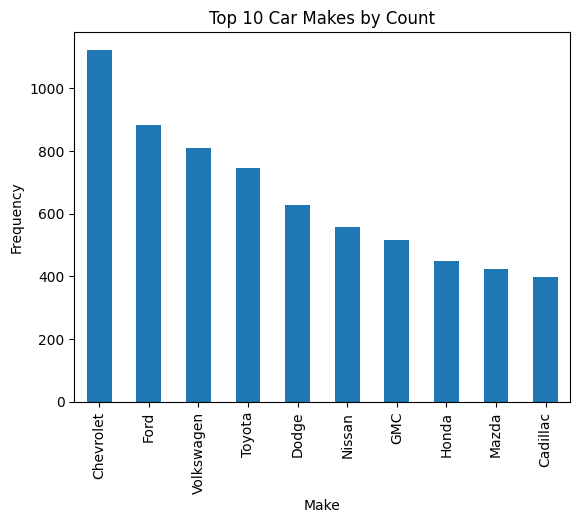

In [21]:
df['Make'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Car Makes by Count')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.show()


Scatter Plot

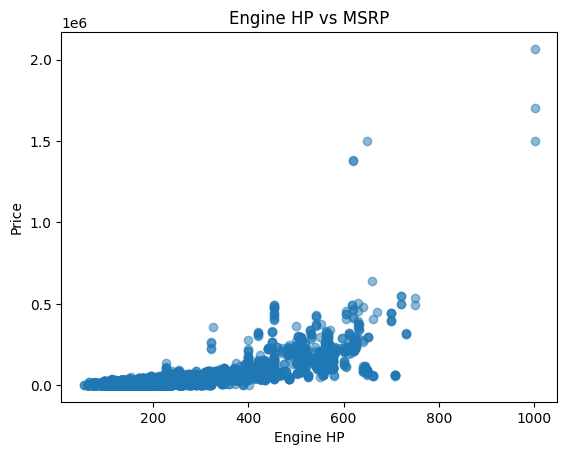

In [22]:
plt.scatter(df['Engine HP'], df['MSRP'], alpha=0.5)
plt.title('Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('Price')
plt.show()


Bar plot

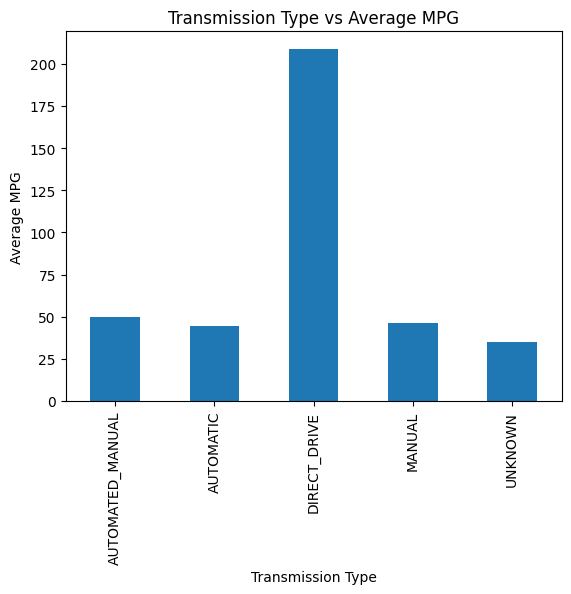

In [28]:
df['Avg MPG'] = (df['city mpg'] + df['highway MPG'])

df.groupby('Transmission Type')['Avg MPG'].mean().plot(kind='bar')
plt.title('Transmission Type vs Average MPG')
plt.ylabel('Average MPG')
plt.show()


Histogram

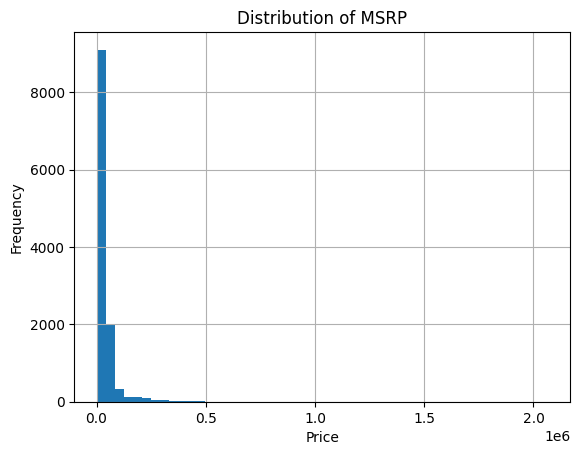

In [20]:
df['MSRP'].hist(bins=50)
plt.title('Distribution of MSRP')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
